In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data_cleaned.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'noted_date', 'temp', 'out/in', 'date', 'year', 'month',
       'weekday', 'weekday_tag'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,noted_date,temp,out/in,date,year,month,weekday,weekday_tag
0,0,08-12-2018 09:30,29,In,2018-08-12,2018,8,6,weekend
1,2,08-12-2018 09:29,41,Out,2018-08-12,2018,8,6,weekend
2,4,08-12-2018 09:29,31,In,2018-08-12,2018,8,6,weekend
3,6,08-12-2018 09:28,29,In,2018-08-12,2018,8,6,weekend
4,8,08-12-2018 09:26,29,In,2018-08-12,2018,8,6,weekend


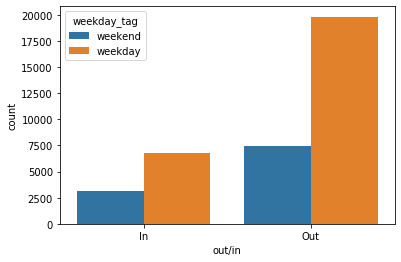

In [6]:
sns.countplot(x = df['out/in'],hue = df.weekday_tag)

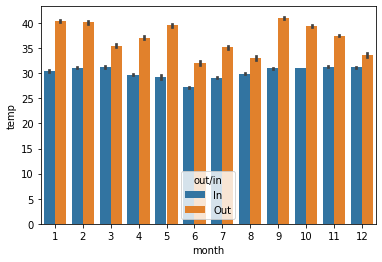

In [7]:
sns.barplot(hue=df['out/in'],y=df.temp,x=df.month)

In [8]:
df.head()

,Unnamed: 0,noted_date,temp,out/in,date,year,month,weekday,weekday_tag
0,0,08-12-2018 09:30,29,In,2018-08-12,2018,8,6,weekend
1,2,08-12-2018 09:29,41,Out,2018-08-12,2018,8,6,weekend
2,4,08-12-2018 09:29,31,In,2018-08-12,2018,8,6,weekend
3,6,08-12-2018 09:28,29,In,2018-08-12,2018,8,6,weekend
4,8,08-12-2018 09:26,29,In,2018-08-12,2018,8,6,weekend


In [9]:
df.drop(['Unnamed: 0','noted_date'],axis=1,inplace=True)

In [10]:
df = df.rename(columns={'out/in':'out_in'})

In [11]:
df.columns

Index(['temp', 'out_in', 'date', 'year', 'month', 'weekday', 'weekday_tag'], dtype='object')

In [12]:
df.head()

,temp,out_in,date,year,month,weekday,weekday_tag
0,29,In,2018-08-12,2018,8,6,weekend
1,41,Out,2018-08-12,2018,8,6,weekend
2,31,In,2018-08-12,2018,8,6,weekend
3,29,In,2018-08-12,2018,8,6,weekend
4,29,In,2018-08-12,2018,8,6,weekend


In [13]:
# get month-wise temperature reading (min/max)

df1 = df.groupby('month')['temp'].agg(['min','max'])
df1

,min,max
month,,
1,29,48
2,30,48
3,21,49
4,23,49
5,24,48
6,24,42
7,25,41
8,29,42
9,24,51


In [14]:
df.columns

Index(['temp', 'out_in', 'date', 'year', 'month', 'weekday', 'weekday_tag'], dtype='object')

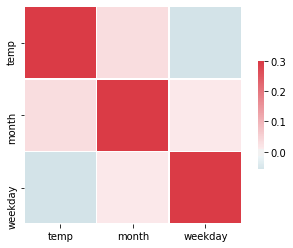

In [15]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['temp','month','out_in','weekday']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

graph for temp: total = 31


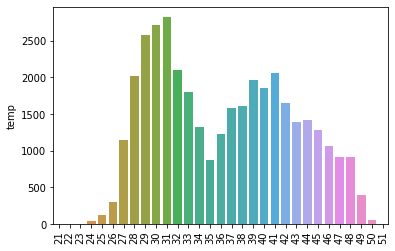

graph for out_in: total = 2


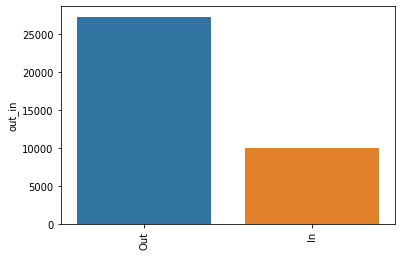

graph for date: total = 86


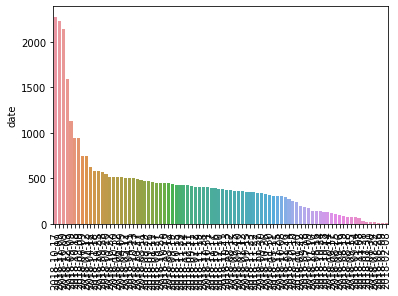

graph for year: total = 1


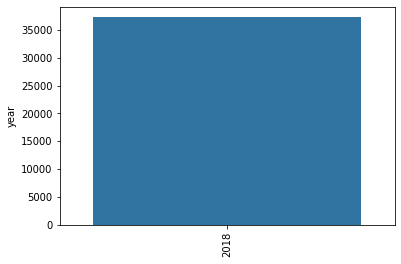

graph for month: total = 12


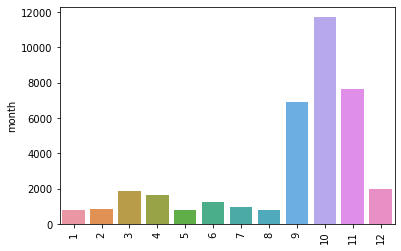

graph for weekday: total = 7


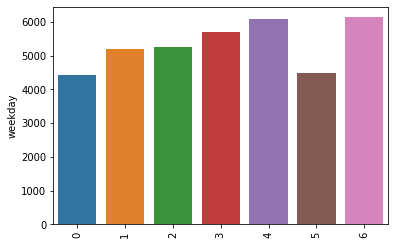

graph for weekday_tag: total = 2


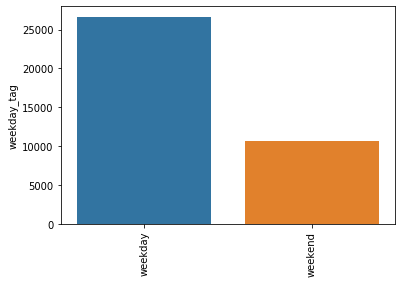

In [16]:
for i in df.columns:
    cat_num = df[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [17]:
df = pd.merge(left = df,right =df1,how = 'left',left_on = "month" ,right_on = "month")

In [18]:
df.columns

Index(['temp', 'out_in', 'date', 'year', 'month', 'weekday', 'weekday_tag',
       'min', 'max'],
      dtype='object')

In [19]:
df.head()

,temp,out_in,date,year,month,weekday,weekday_tag,min,max
0,29,In,2018-08-12,2018,8,6,weekend,29,42
1,41,Out,2018-08-12,2018,8,6,weekend,29,42
2,31,In,2018-08-12,2018,8,6,weekend,29,42
3,29,In,2018-08-12,2018,8,6,weekend,29,42
4,29,In,2018-08-12,2018,8,6,weekend,29,42


In [20]:
df["unique_id"] = df.index

In [21]:
df2 = df.groupby(['weekday_tag']).temp.agg(['min','max'])
df3 = df.groupby(['out_in']).temp.agg(['min','max'])
df4 = df.groupby('out_in').unique_id.count()
df5 = df.groupby('weekday_tag').unique_id.count()
df6 = df.groupby('month').unique_id.count()

In [22]:
df2.head()

,min,max
weekday_tag,,
weekday,21,50
weekend,23,51


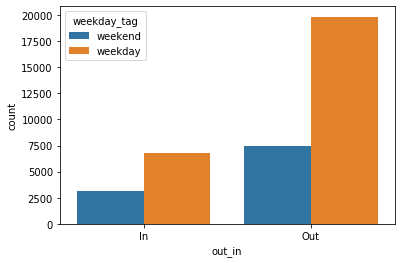

In [23]:
# Max and Min temp based on Weekend/Weekend
sns.countplot(x = df.out_in,hue = df.weekday_tag)


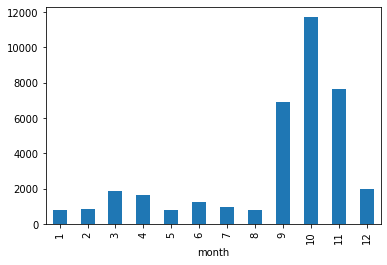

In [24]:
#Monthwise temp count
df6.plot.bar()

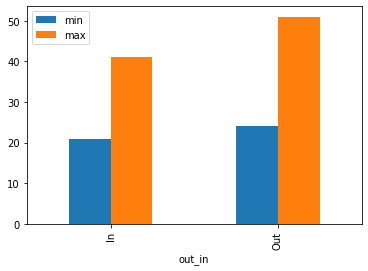

In [25]:
#Weekwise max or min temp
df3.plot.bar()

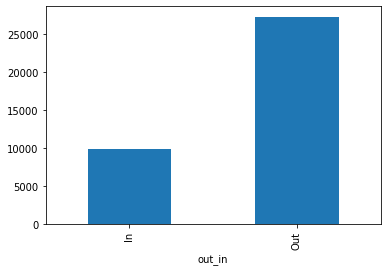

In [26]:
df4.plot.bar()

In [27]:
df.to_csv('dataEDA.csv')